# Graph visualization

1. Imports
2. Vertexs
3. Edges
4. Graph

### 1. Imports

In [189]:
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

### 2. Vertexs

In [199]:
edges_data = pd.read_csv('ohlctrades.csv')

vertexs_data = pd.DataFrame(columns=['currency','indexvertex'])

vertexs_data['currency'] = pd.concat([edges_data['from'],edges_data['to']]).drop_duplicates()

vertexs_data['indexvertex'] = vertexs_data['currency'].rank(method='dense').astype('int')

print(vertexs_data)

print('Num vertexs: '+ str(vertexs_data['indexvertex'].count()))
#print(edges_data)

    currency  indexvertex
0       AAVE            1
3        ADA            2
6       ALGO            3
9       ANKR            4
11       ANT            5
..       ...          ...
133      XTZ           68
136      YFI           69
139      ZRX           70
1        GBP           25
38       DAI           13

[70 rows x 2 columns]
Num vertexs: 70


### 3. Edges

In [222]:

edges_data['indexvertexfrom'] = pd.merge(edges_data,vertexs_data, how='left',left_on=['from'], right_on=['currency'])['indexvertex']

edges_data['indexvertexto'] = pd.merge(edges_data,vertexs_data, how='left',left_on=['to'], right_on=['currency'])['indexvertex']

edges_nodes = edges_data[['indexvertexfrom','indexvertexto']].to_numpy()

weigths = edges_data['count'].to_numpy()

print(edges_data)


     from  indexvertexfrom   to  indexvertexto  altname  unixtimestamp  \
0    AAVE                1  ETH             18  AAVEETH     1663977600   
1    AAVE                1  GBP             25  AAVEGBP     1663977600   
2    AAVE                1  XBT             66  AAVEXBT     1663977600   
3     ADA                2  ETH             18   ADAETH     1663977600   
4     ADA                2  GBP             25   ADAGBP     1663977600   
..    ...              ...  ...            ...      ...            ...   
136   YFI               69  ETH             18   YFIETH     1663977600   
137   YFI               69  GBP             25   YFIGBP     1663977600   
138   YFI               69  XBT             66   YFIXBT     1663977600   
139   ZRX               70  GBP             25   ZRXGBP     1663977600   
140   ZRX               70  XBT             66   ZRXXBT     1663977600   

           date         open         high          low        close      vwap  \
0    2022-09-24     0.058100  

### 4. Graph

<AxesSubplot:>

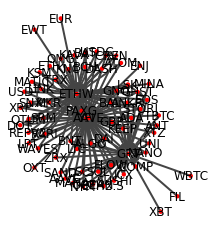

In [220]:
g = ig.Graph(edges=edges_nodes, directed=True)

g.vs['currency'] = vertexs_data['currency'].to_numpy()
g.es['count'] = weigths

visual_style = {}
visual_style["vertex_label"] = g.vs['currency']
visual_style["edge_arrow_size"] = 0.03
visual_style["edge_arrow_width"] = 1 #[count for count in g.es["count"]]
visual_style["layout"] = g.layout('kk')
visual_style['vertex_frame_width'] = 0
#visual_style["bbox"] = (1024, 1024)
#visual_style["margin"] = 10
#visual_style["palette"]=ig.ClusterColoringPalette(len(set(g.es["count"])) + 3)

fig, ax = plt.subplots()
ig.plot(g, target=ax, **visual_style)